In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv("customer_segmentation_data.csv")

In [5]:
df.head()

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2


In [6]:
df.tail()

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
53498,44809,35,Female,Divorced,Associate Degree,Andaman and Nicobar Islands,Salesperson,120850,policy3,01-01-2019,Mobile App,policy1,586401,4404,Family,In-Person Meeting,Phone,Afternoon,German,Segment5
53499,65485,61,Male,Single,Doctorate,Himachal Pradesh,Entrepreneur,122309,policy5,5/18/2021,Mobile App,policy4,637733,1285,Group,Text,Mail,Afternoon,German,Segment1
53500,26213,25,Male,Divorced,Doctorate,Assam,Teacher,49258,policy2,11/27/2018,In-Person,policy1,631057,4407,Individual,Text,Text,Weekends,French,Segment4
53501,63136,42,Male,Married,Doctorate,Andhra Pradesh,Artist,66301,policy4,06-04-2021,In-Person,policy1,730385,4482,Business,Mail,Phone,Morning,French,Segment5
53502,62125,20,Male,Divorced,Doctorate,Daman and Diu,Salesperson,136632,policy2,10/14/2022,Phone,policy1,743262,4499,Group,Text,In-Person Meeting,Evening,German,Segment2


In [7]:
df.describe() # Statatical Summary 

,Customer ID,Age,Income Level,Coverage Amount,Premium Amount
count,53503.000000,53503.000000,53503.000000,53503.000000,53503.000000
mean,52265.204998,44.140945,82768.324318,492580.789638,3023.702447
std,28165.000067,15.079486,36651.075670,268405.505571,1285.834295
min,1.000000,18.000000,20001.000000,50001.000000,500.000000
25%,28950.500000,32.000000,51568.500000,249613.500000,1817.000000
50%,55858.000000,43.000000,80719.000000,477261.000000,3194.000000
75%,76096.000000,57.000000,115973.500000,739124.000000,4311.500000
max,100000.000000,70.000000,149999.000000,1000000.000000,5000.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53503 entries, 0 to 53502
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Customer ID                         53503 non-null  int64 
 1   Age                                 53503 non-null  int64 
 2   Gender                              53503 non-null  object
 3   Marital Status                      53503 non-null  object
 4   Education Level                     53503 non-null  object
 5   Geographic Information              53503 non-null  object
 6   Occupation                          53503 non-null  object
 7   Income Level                        53503 non-null  int64 
 8   Behavioral Data                     53503 non-null  object
 9   Purchase History                    53503 non-null  object
 10  Interactions with Customer Service  53503 non-null  object
 11  Insurance Products Owned            53503 non-null  ob

In [9]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Marital Status', 'Education Level',
       'Geographic Information', 'Occupation', 'Income Level',
       'Behavioral Data', 'Purchase History',
       'Interactions with Customer Service', 'Insurance Products Owned',
       'Coverage Amount', 'Premium Amount', 'Policy Type',
       'Customer Preferences', 'Preferred Communication Channel',
       'Preferred Contact Time', 'Preferred Language', 'Segmentation Group'],
      dtype='object')

In [8]:
df.dtypes

Customer ID                            int64
Age                                    int64
Gender                                object
Marital Status                        object
Education Level                       object
Geographic Information                object
Occupation                            object
Income Level                           int64
Behavioral Data                       object
Purchase History                      object
Interactions with Customer Service    object
Insurance Products Owned              object
Coverage Amount                        int64
Premium Amount                         int64
Policy Type                           object
Customer Preferences                  object
Preferred Communication Channel       object
Preferred Contact Time                object
Preferred Language                    object
Segmentation Group                    object
dtype: object

In [9]:
df.isnull()

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53498,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
53499,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
53500,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
53501,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

Customer ID                           0
Age                                   0
Gender                                0
Marital Status                        0
Education Level                       0
Geographic Information                0
Occupation                            0
Income Level                          0
Behavioral Data                       0
Purchase History                      0
Interactions with Customer Service    0
Insurance Products Owned              0
Coverage Amount                       0
Premium Amount                        0
Policy Type                           0
Customer Preferences                  0
Preferred Communication Channel       0
Preferred Contact Time                0
Preferred Language                    0
Segmentation Group                    0
dtype: int64

In [2]:
df.dropna(inplace=True)

NameError: name 'df' is not defined

In [13]:
#  Selecting articular column wise
df["Age"].head()

0    23
1    26
2    29
3    20
4    25
Name: Age, dtype: int64

In [14]:
#Selecting  multiple cloumns 
df[["Age","Income Level"]].head()

,Age,Income Level
0,23,70541
1,26,54168
2,29,73899
3,20,63381
4,25,38794


In [15]:
# Apply filters on row
df[df["Age"]>50]

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
6,37676,55,Male,Single,Bachelor's Degree,Rajasthan,Manager,94891,policy3,07-04-2021,Chat,policy2,604069,3661,Group,In-Person Meeting,Text,Weekends,Mandarin,Segment5
10,38477,69,Male,Widowed,Master's Degree,Andaman and Nicobar Islands,Artist,62099,policy2,3/20/2022,In-Person,policy1,898873,2935,Business,In-Person Meeting,Text,Weekends,French,Segment3
13,67128,65,Female,Widowed,High School Diploma,Himachal Pradesh,Entrepreneur,24648,policy3,12/28/2018,Phone,policy3,276109,3971,Individual,In-Person Meeting,In-Person Meeting,Evening,English,Segment1
14,34814,64,Male,Single,High School Diploma,Nagaland,Doctor,105009,policy3,09-05-2020,Phone,policy1,399139,2760,Individual,In-Person Meeting,Email,Evening,German,Segment3
15,86048,53,Male,Single,Bachelor's Degree,Manipur,Engineer,29783,policy1,08-06-2021,Chat,policy2,807659,2334,Group,In-Person Meeting,Email,Afternoon,Spanish,Segment5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53483,1961,64,Male,Separated,Master's Degree,Kerala,Teacher,149241,policy2,06-03-2022,Phone,policy4,353348,4211,Individual,Phone,In-Person Meeting,Anytime,Mandarin,Segment4
53484,88152,55,Male,Widowed,High School Diploma,West Bengal,Salesperson,105239,policy2,09-05-2022,In-Person,policy4,566505,1223,Group,Mail,Phone,Evening,English,Segment4
53485,51099,68,Female,Divorced,Associate Degree,Assam,Nurse,65631,policy4,2/20/2022,Chat,policy2,367850,2096,Family,Email,Phone,Morning,Mandarin,Segment2
53489,28883,54,Male,Divorced,High School Diploma,Nagaland,Teacher,129606,policy2,2/16/2019,Mobile App,policy1,98465,1051,Family,Text,Text,Morning,English,Segment4


In [16]:
# Sort the values in ascending order(L-H)
df.sort_values(by="Income Level", ascending=True).head()

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
5648,40296,56,Female,Widowed,Master's Degree,Mizoram,Artist,20001,policy1,4/15/2020,Chat,policy3,688145,1362,Individual,Email,Phone,Afternoon,Mandarin,Segment4
11864,65259,44,Female,Single,Doctorate,Gujarat,Salesperson,20001,policy5,7/15/2023,Mobile App,policy3,599129,4482,Family,Text,Phone,Weekends,French,Segment4
53432,85265,26,Male,Separated,Doctorate,West Bengal,Teacher,20001,policy1,07-06-2020,Chat,policy2,540076,1192,Family,In-Person Meeting,Phone,Morning,German,Segment2
1613,3636,34,Female,Married,Associate Degree,Tamil Nadu,Artist,20001,policy3,09-07-2020,Chat,policy2,141354,4898,Group,Phone,Text,Morning,German,Segment5
29251,35143,44,Female,Separated,Associate Degree,Bihar,Teacher,20001,policy5,9/18/2019,Chat,policy5,129092,4406,Group,Text,Phone,Evening,German,Segment4


In [17]:
# Sort the values in Descending order(H-L)
df.sort_values(by="Income Level", ascending=False).head()

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
18852,23526,37,Female,Widowed,Doctorate,Chhattisgarh,Entrepreneur,149999,policy3,4/19/2022,Chat,policy2,657063,3611,Family,Phone,Email,Morning,German,Segment5
53449,47160,25,Male,Widowed,Master's Degree,Lakshadweep,Salesperson,149999,policy4,10/16/2019,Chat,policy1,150707,4617,Individual,Mail,In-Person Meeting,Anytime,Spanish,Segment2
13380,86070,21,Male,Married,High School Diploma,Mizoram,Doctor,149999,policy1,9/22/2022,Chat,policy3,530961,2370,Individual,Email,Mail,Evening,German,Segment4
46016,11153,19,Female,Married,Bachelor's Degree,Uttarakhand,Nurse,149999,policy1,12/24/2019,Phone,policy1,867991,2616,Business,Text,Text,Morning,German,Segment2
29435,86808,41,Male,Widowed,Bachelor's Degree,Madhya Pradesh,Entrepreneur,149999,policy3,8/21/2023,In-Person,policy4,178600,3853,Group,Mail,Text,Evening,German,Segment1


# Aggregates

In [18]:
# Mean
print(f"Mean of Age is :{df['Age'].mean()}")

# Median
print(f"Median of Income Level is:{df['Income Level'].median()}")

# Mode
print(f"Mode of Education Level is:{df['Education Level'].mode().iloc[0]}")


Mean of Age is :44.140945367549485
Median of Income Level is:80719.0
Mode of Education Level is:Associate Degree


In [19]:
# Group by aggregate
df.groupby("Gender")["Income Level"].mean()

Gender
Female    82396.768728
Male      83119.680061
Name: Income Level, dtype: float64

In [20]:
# Standard Deviation
print(f"Standard deviation of Customer ID is :{df['Customer ID'].std()}")
# Variance
print(f"Variance of Coverage amount is :{df['Coverage Amount'].var()}")

Standard deviation of Customer ID is :28165.000066798864
Variance of Coberage amount is :72041515420.94006


In [21]:
# Value Count
df["Marital Status"].value_counts()

Marital Status
Married      13219
Divorced     13151
Single        9195
Widowed       9077
Separated     8861
Name: count, dtype: int64

In [7]:
# Rename Column
df.rename(columns={"Income Level":"Income"},inplace=True)

In [23]:
# Create new Column
df["Premium per coverage"]= df["Premium Amount"]/df["Coverage Amount"]
df.head(4)

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income,Behavioral Data,Purchase History,...,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group,Premium per coverage
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,...,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5,0.007499
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,...,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5,0.002520
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,...,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3,0.005702
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,...,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3,0.005511


# Visualizations

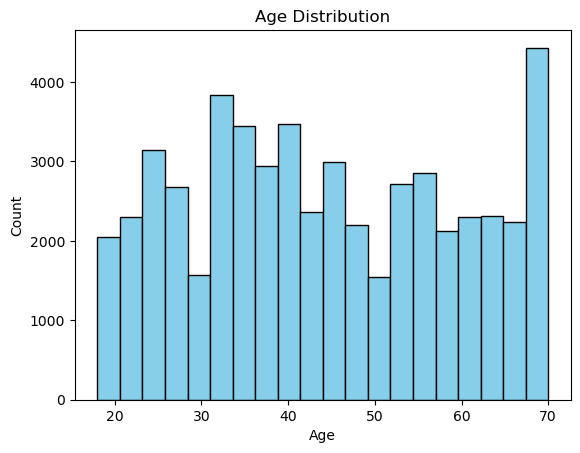

In [24]:
# Histogram
plt.hist(df["Age"], bins=20, color="skyblue", edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

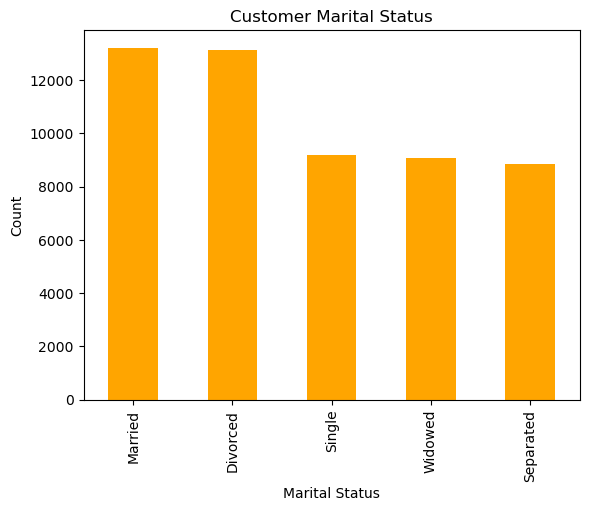

In [25]:
# Bar Chart
df["Marital Status"].value_counts().plot(kind="bar", color="orange")
plt.title("Customer Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()


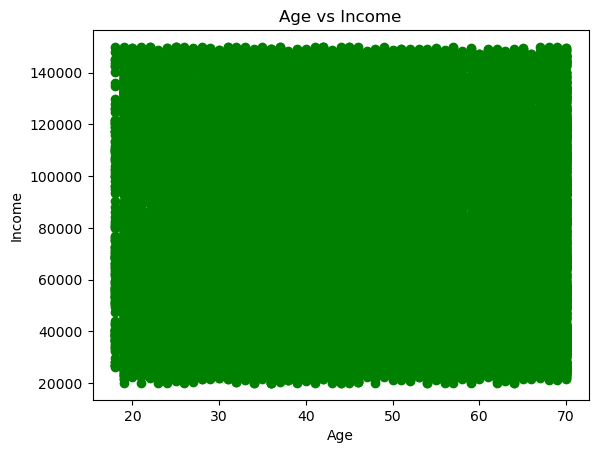

In [26]:
# Scatter plot
plt.scatter(df["Age"], df["Income"] , color="green")
plt.title("Age vs Income")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

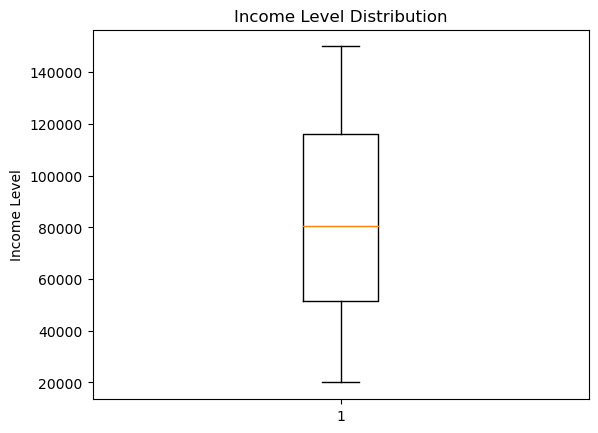

In [27]:
# Box plot
plt.boxplot(df["Income"])
plt.title("Income Level Distribution")
plt.ylabel("Income Level")
plt.show()

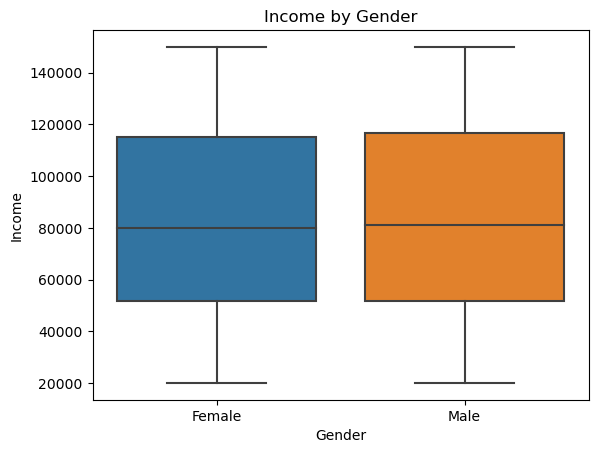

In [28]:
sns.boxplot(x="Gender", y="Income", data=df)
plt.title("Income by Gender")
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

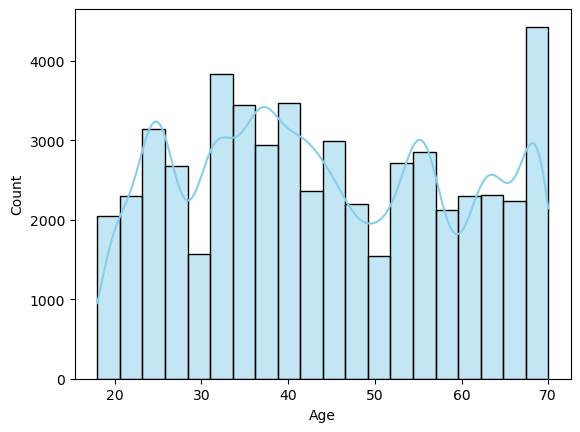

In [29]:
sns.histplot(df["Age"], bins=20, kde=True, color="skyblue")

<Axes: xlabel='Gender', ylabel='Income'>

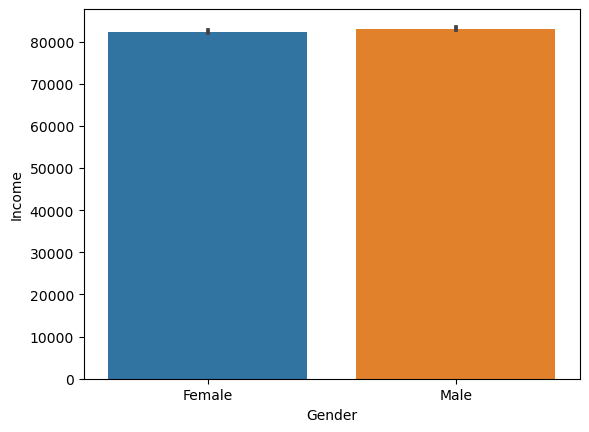

In [30]:
sns.barplot(x="Gender", y="Income", data=df)

<Axes: xlabel='Age', ylabel='Income'>

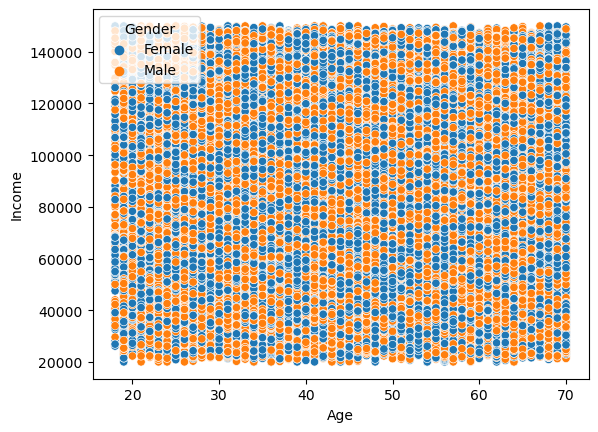

In [31]:
sns.scatterplot(x="Age", y="Income", hue="Gender", data=df)

C:\Users\siddh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


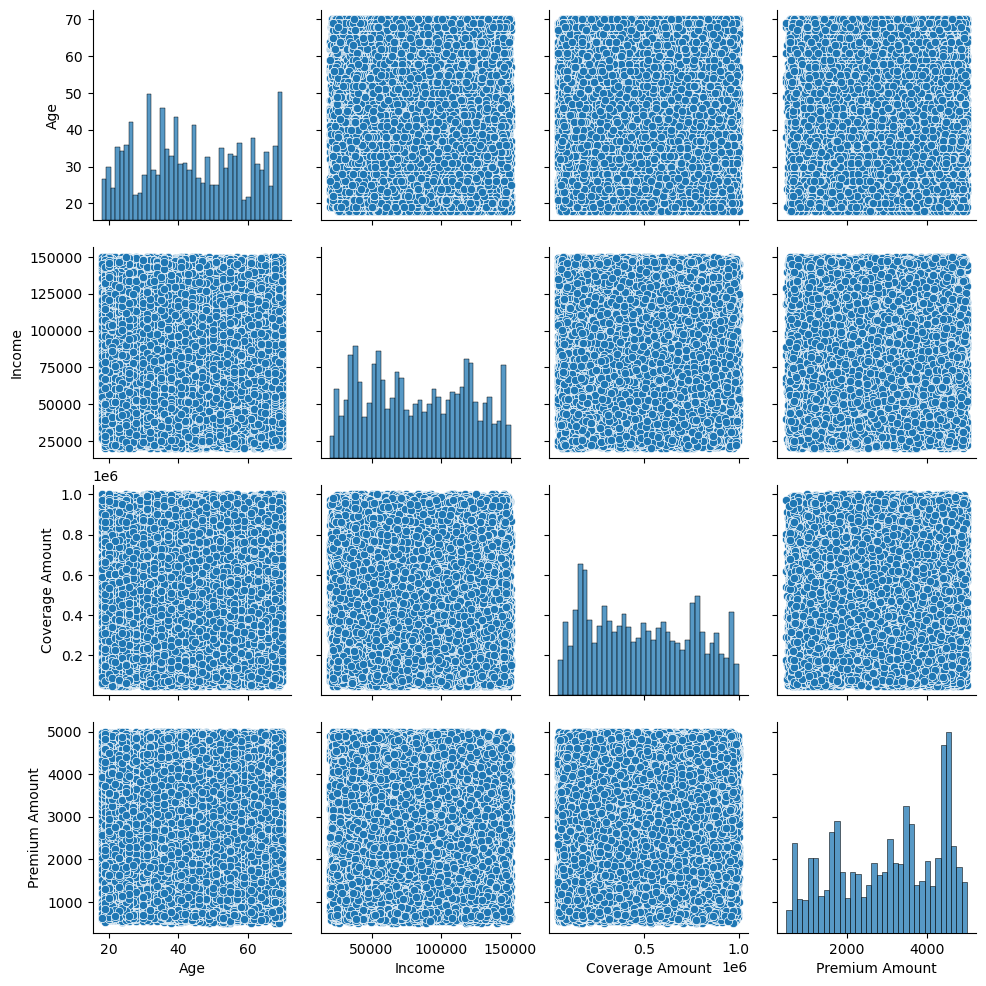

In [35]:
sns.pairplot(df[["Age", "Income", "Coverage Amount", "Premium Amount"]])
plt.show()

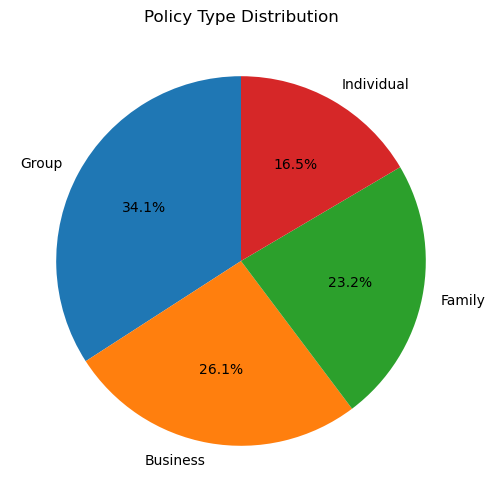

In [37]:
policy_counts = df["Policy Type"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(policy_counts, labels=policy_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Policy Type Distribution")
plt.show()

# K-means Clustering


In [38]:
# Numeric Features
X = df[["Age", "Income", "Coverage Amount", "Premium Amount"]]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose no of clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Result
print(df[["Age", "Income", "Coverage Amount", "Premium Amount", "Cluster"]].head())


   Age  Income  Coverage Amount  Premium Amount  Cluster
0   23   70541           366603            2749        1
1   26   54168           780236            1966        2
2   29   73899           773926            4413        1
3   20   63381           787815            4342        1
4   25   38794           366506            1276        2


# Elbow Method

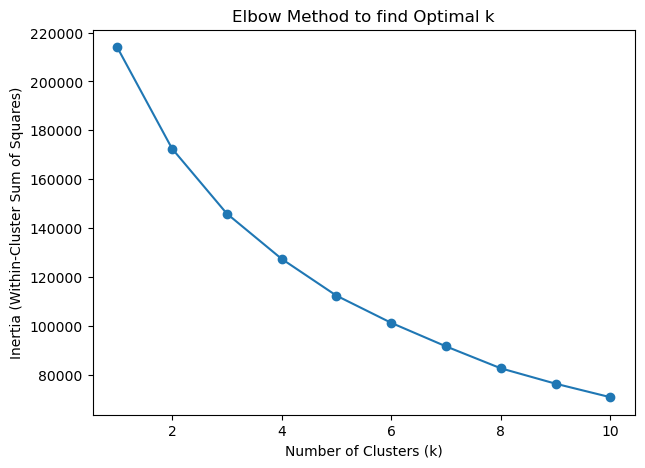

   Age  Income  Coverage Amount  Premium Amount  Cluster
0   23   70541           366603            2749        1
1   26   54168           780236            1966        2
2   29   73899           773926            4413        1
3   20   63381           787815            4342        1
4   25   38794           366506            1276        2


In [40]:
# Numeric Features
X = df[["Age", "Income", "Coverage Amount", "Premium Amount"]]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method find K
inertia = []
K = range(1, 11)  # Try k from 1 to 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(7,5))
plt.plot(K, inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method to find Optimal k")
plt.show()

# Apply KMeans 
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# results
print(df[["Age", "Income", "Coverage Amount", "Premium Amount", "Cluster"]].head())

# Silhoutte Score

In [8]:
# s(i) = b(i)-a(i)/(max(a(i),b(i))
# Numeric Features
X = df[["Age", "Income", "Coverage Amount", "Premium Amount"]]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find best k using silhouette score
best_k = 0
best_score = -1
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k={k}, silhouette score={score:.4f}")
    if score > best_score:
        best_k = k
        best_score = score

print("\n Best number of clusters:", best_k)
print("Best silhouette score:", best_score)

# final KMeans with best k
final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df["Cluster"] = final_kmeans.fit_predict(X_scaled)

# results
print("\nClustered data (sample):")
print(df[["Age", "Income", "Coverage Amount", "Premium Amount", "Cluster"]].head())

k=2, silhouette score=0.1925
k=3, silhouette score=0.1894
k=4, silhouette score=0.1910
k=5, silhouette score=0.2009
k=6, silhouette score=0.2044
k=7, silhouette score=0.2129
k=8, silhouette score=0.2340
k=9, silhouette score=0.2286
k=10, silhouette score=0.2291

 Best number of clusters: 8
Best silhouette score: 0.23403927450277884

Clustered data (sample):
   Age  Income  Coverage Amount  Premium Amount  Cluster
0   23   70541           366603            2749        0
1   26   54168           780236            1966        2
2   29   73899           773926            4413        7
3   20   63381           787815            4342        7
4   25   38794           366506            1276        2


# PCA

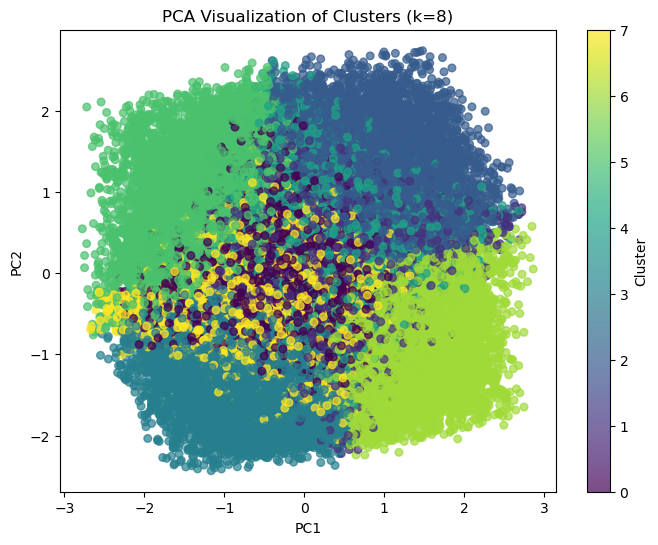

In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df["Cluster"], cmap="viridis", s=30, alpha=0.7)
plt.title(f"PCA Visualization of Clusters (k={best_k})")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()